# 📌 GPU選択
**「ランタイム」⇒「ランタイムのタイプを変更」から、選択可能な「GPU」あるいは「TPU」を選ぶ**

# 📌 Google ドライブをマウントする

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 🇯🇵 日本語化の準備
**japanize-matplotlibのインストール**<br>
Google Colaboratoryで日本語を使えるようにするためには<br>
各自のColab環境に japanize-matplotlibを下記コマンドにより、セッションごとに毎回インストールする必要があります<br>
**!pip install japanize-matplotlib**<br>
 このように先頭に ! を付けるとOSコマンドを実行できます。  
 プログラムで使用するときは下記のようにライブラリをインポートします<br>
**import japanize_matplotlib**

In [ ]:
!pip install japanize-matplotlib

# プログラム内での使い方
# import japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 106.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=89c6aeebce40fe54060c22f5261dd4a40c8b48301c4ae822b6ed2264eda65a99
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


# 🟦 XOR 実現するネットワーク

**学習用モデル**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

#  XOR のデータセット
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
Y = np.array([[0], [1], [1], [0]], dtype=np.float32)

# モデルの構築 === Functionalモデル
inputs = keras.Input(shape=(2,))  # 入力層（2次元）
x = layers.Dense(4, activation='relu')(inputs)  # 隠れ層 4ユニット 活性化関数はReLU
outputs = layers.Dense(1, activation='sigmoid')(x)  # 出力層 1ユニット　活性化関数はSigmoid
model = keras.Model(inputs=inputs, outputs=outputs)

# 損失関数と最適化手法の設定
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

model.summary()

2025-04-23 11:50:31.663829: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-23 11:50:31.663871: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-23 11:50:31.665129: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-23 11:50:31.672205: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-23 11:50:32.423316: W tensorflow/comp

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 17 (68.00 Byte)
Trainable params: 17 (68.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2025-04-23 11:50:33.254600: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 690 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080, pci bus id: 0000:17:00.0, compute capability: 7.5
2025-04-23 11:50:33.255172: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 6695 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2080, pci bus id: 0000:65:00.0, compute capability: 7.5


**学習の実行**

In [ ]:
# 学習の実行
history = model.fit(X, Y, epochs=2000, verbose=0)  # verbose=0 でログ出力を出さない、出力を出すには 1

# 学習後の結果を確認 ===
predictions = model.predict(X)
print("\n=== XOR 学習結果 ===")
for i in range(4):
    print(f"Input: {X[i].tolist()}, Output: {predictions[i][0]:.5f}")

2025-04-23 11:50:41.502163: I external/local_xla/xla/service/service.cc:168] XLA service 0x74b84c3f8b30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-04-23 11:50:41.502212: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2080, Compute Capability 7.5
2025-04-23 11:50:41.502223: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA GeForce RTX 2080, Compute Capability 7.5
2025-04-23 11:50:41.512324: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-04-23 11:50:41.538718: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1745376641.619284   80651 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 [==============================] - 0s 58ms/step

=== XOR 学習結果 ===
Input: [0.0, 0.0], Output: 0.00184
Input: [0.0, 1.0], Output: 0.99858
Input: [1.0, 0.0], Output: 0.99858
Input: [1.0, 1.0], Output: 0.00140


**学習履歴の描画**

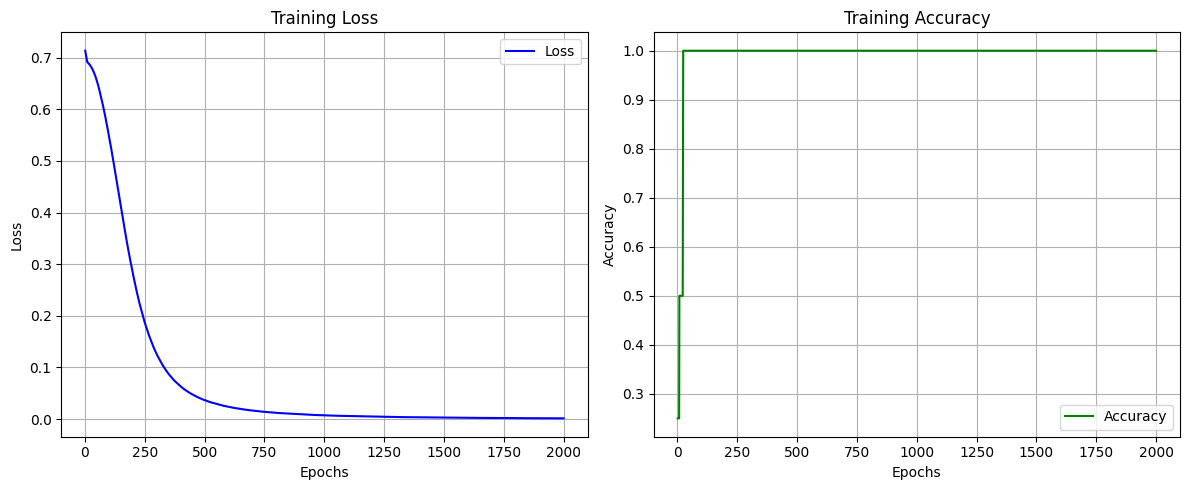

In [ ]:
import matplotlib.pyplot as plt

# 学習履歴から loss と accuracy を取り出す
loss = history.history['loss']
accuracy = history.history['accuracy']
epochs = range(1, len(loss) + 1)

# Loss のプロット
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label='Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Accuracy のプロット
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'g', label='Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# 🟦 単純なCNNモデルによる手書き文字認識


## 🔶 学習用コードと学習履歴の描画
**単純なCNNモデルのコード**

In [ ]:
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, utils
import numpy as np

# データ準備
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = utils.to_categorical(train_labels, 10)
test_labels = utils.to_categorical(test_labels, 10)

# Functionalモデルで定義する 畳み込みそうは2層
inputs = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=outputs)

# コンパイル
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

**学習の実行**

In [ ]:
# 学習

history = model.fit(
    x=train_images,
    y=train_labels,
    epochs=20,
    batch_size=32,
    validation_data=(test_images, test_labels))

# 学習したモデルを保存
model.save('/content/drive/MyDrive/model/mnist_cnn.keras')

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9014 - loss: 0.3158 - val_accuracy: 0.9798 - val_loss: 0.0602
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9828 - loss: 0.0553 - val_accuracy: 0.9886 - val_loss: 0.0358
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9893 - loss: 0.0326 - val_accuracy: 0.9883 - val_loss: 0.0360
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9919 - loss: 0.0247 - val_accuracy: 0.9892 - val_loss: 0.0340
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9944 - loss: 0.0186 - val_accuracy: 0.9875 - val_loss: 0.0368
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9959 - loss: 0.0127 - val_accuracy: 0.9898 - val_loss: 0.0335
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9960 - loss: 0.0117 - val_accuracy: 0.9912 - val_loss: 0.0301
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9970 - loss: 0.0087

**学習履歴の描画**

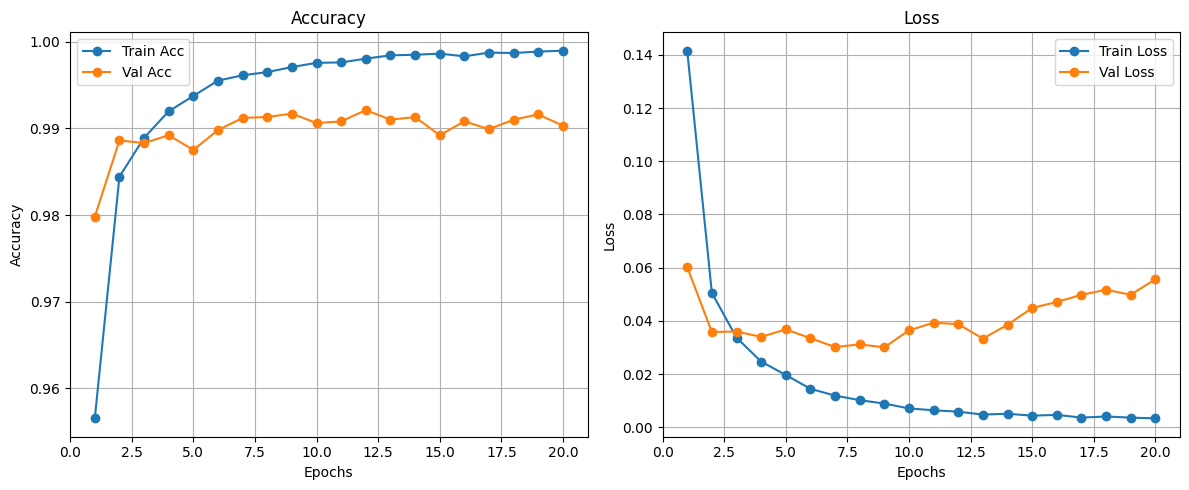

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# 配列の長さを基準にする
epochs_range = range(1, len(acc)+1)

# 精度のグラフ
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, 'o-', label='Train Acc')
plt.plot(epochs_range, val_acc, 'o-', label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.xlim(0, len(acc) + 1)
plt.grid(True)

# 損失のグラフ
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, 'o-', label='Train Loss')
plt.plot(epochs_range, val_loss, 'o-', label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xlim(0, len(acc) + 1)
plt.grid(True)

plt.tight_layout()
plt.show()

## 🔶 畳み込み結果・プーリング結果の確認

**モデルのレイヤーへインデックをつける**

In [ ]:
# モデルを構成するレイヤーをインデックス付きで出力し確認する
for i, layer in enumerate(model.layers):
    if hasattr(layer, 'output_shape'):
        print(f"{i}: {layer.name} -- {layer.output_shape}")
    else:
        print(f"{i}: {layer.name} -- (no output_shape)")


0: input_layer -- (no output_shape)
1: conv2d -- (no output_shape)
2: max_pooling2d -- (no output_shape)
3: conv2d_1 -- (no output_shape)
4: max_pooling2d_1 -- (no output_shape)
5: flatten -- (no output_shape)
6: dense -- (no output_shape)
7: dense_1 -- (no output_shape)


**レイヤー出力の可視化**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


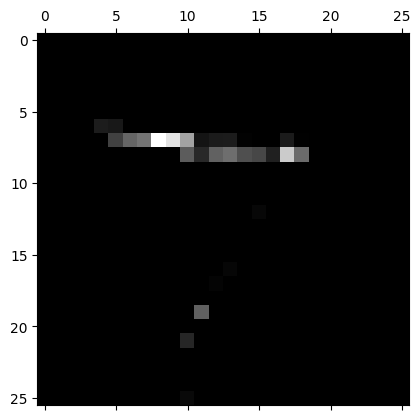

In [ ]:
import numpy as np
from keras import datasets, layers, models, utils
import matplotlib.pyplot as plt

model = models.load_model('/content/drive/MyDrive/model/mnist_cnn.keras')

# layer_outputs に、モデルの1〜4番目のレイヤーの出力を順に格納する（インデックス1〜4を含む）
layer_outputs = [layer.output for layer in model.layers[1:5]] #レイヤー 1〜4までを抽出

# activation_model は、入力に対して指定した中間層の出力を返すモデル（中間層可視化用サブモデル）
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# 可視化対象の画像（test_imagesの最初の1枚）をバッチ次元を追加して入力形式に変換（形状を (1, 28, 28, 1) にする）
img = np.expand_dims(test_images[0], axis=0)

# 中間層出力を取得（リスト形式で各レイヤーの出力を含む）
activations = activation_model.predict(img)

# activations[0] は1番目の可視化対象レイヤー（この場合、インデックス=1＝モデルの2層目conv2d）の出力
layer_activation = activations[0]

# layer_activationの0番目の画像（1枚分のバッチ）・32チャネルのうち1つ目のチャネル（0番チャネル）を可視化
plt.matshow(layer_activation[0,:,:,0], cmap='gray')

# グラフの描画を実行
plt.show()

**畳み込み層とプーリング層のすべてのチャネル出力を可視化**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


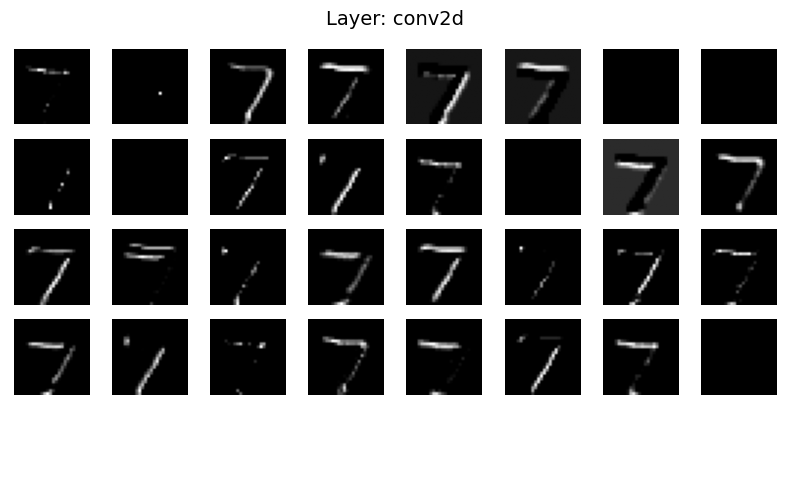

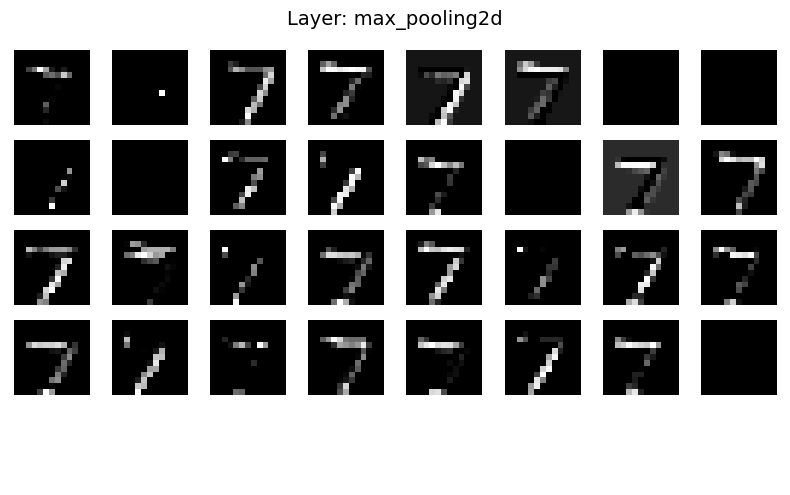

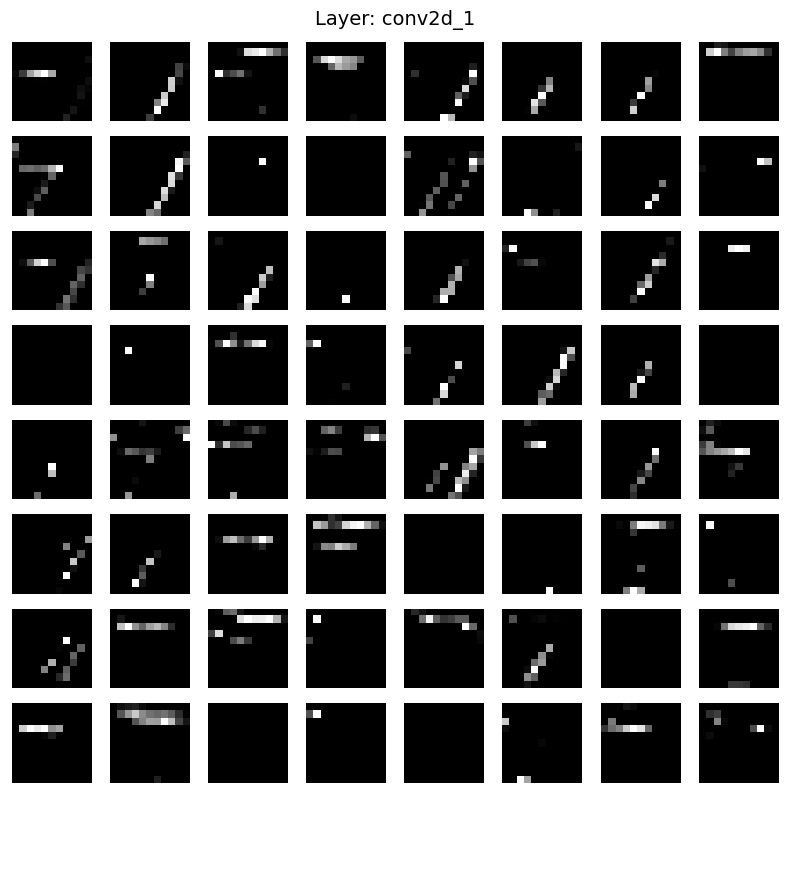

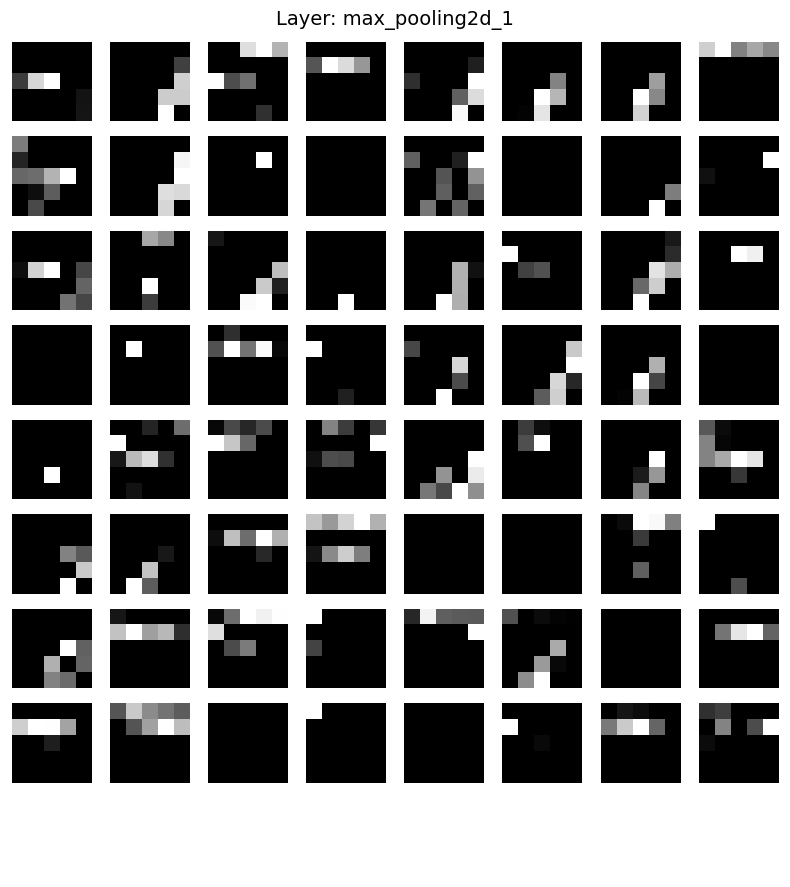

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model

# 1〜5層までの出力を取得
layer_outputs = [layer.output for layer in model.layers[1:6]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# 画像を1枚拡張して予測
img = np.expand_dims(test_images[0], axis=0)
activations = activation_model.predict(img)

# 各レイヤーの出力を順に可視化
layer_names = [layer.name for layer in model.layers[1:5]]

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]  # チャネル数
    size = layer_activation.shape[1]         # 出力画像サイズ（縦）

    # 図のレイアウト計算（8列で整形）
    n_cols = 8
    n_rows = n_features // n_cols + 1

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols, n_rows))
    fig.suptitle(f"Layer: {layer_name}", fontsize=14)

    for i in range(n_rows * n_cols):
        ax = axes[i // n_cols, i % n_cols]
        if i < n_features:
            ax.imshow(layer_activation[0, :, :, i], cmap='gray')
        ax.axis('off')

    plt.tight_layout()
    plt.show()


## 🔶 フィルタの可視化
**フィルタの可視化**

(np.float64(-0.5), np.float64(2.5), np.float64(2.5), np.float64(-0.5))

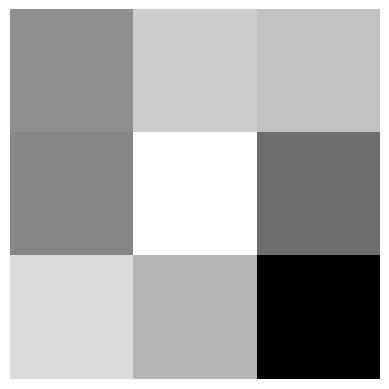

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def deprocess_image(x):
    # データを可視化：中心を0、標準偏差を0.1にする
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # [0,1]でクリッピング
    x += 0.5
    x = np.clip(x, 0, 1)

    # 画像データへ変換
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

w = model.layers[1].get_weights()[0]
img = deprocess_image(w[:,:,:,1])
img = np.squeeze(img)
plt.imshow(img, cmap='gray')
plt.axis('off')

## 🔶 conv2dの畳み込みレイヤーのフィルタ 32チャネル分を可視化
**畳み込み層のすべてのチェネル出力を可視化**

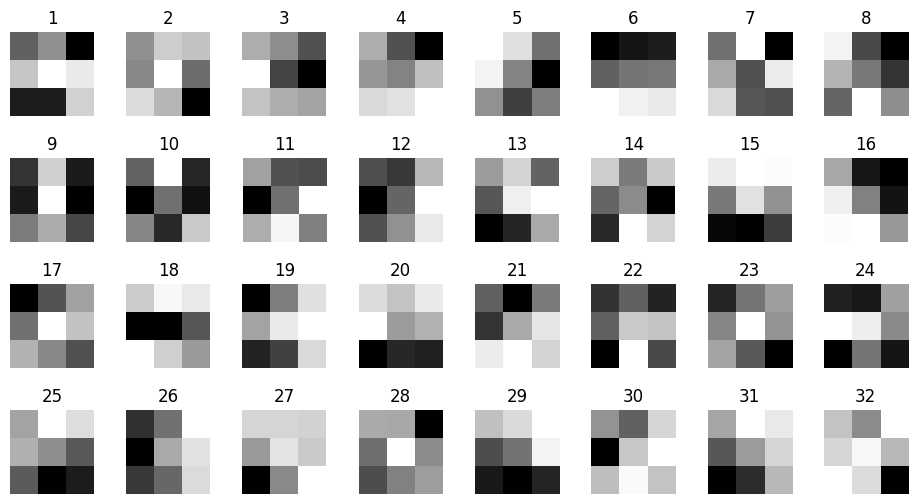

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def deprocess_image(x):
    # データを可視化：中心を0、標準偏差を0.1にする
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # [0,1]でクリッピング
    x += 0.5
    x = np.clip(x, 0, 1)

    # 画像データへ変換
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

images_per_row=8
n_cols = 4

w = model.layers[1].get_weights()[0]

plt.figure(figsize=(12,6))
plt.subplots_adjust(wspace=0, hspace=0.5)
for col in range(n_cols):
    for row in range(images_per_row):
      img = deprocess_image(w[:,:,:,col * images_per_row + row])
      img = np.squeeze(img)

      plt.subplot(n_cols,images_per_row, col * images_per_row + row+1)
      plt.title(col * images_per_row + row+1)
      plt.imshow(img, cmap='gray')
      plt.axis('off')

In [ ]:
len(activations)

5

# 🟦 犬・猫画像データの前処理とデータ拡張
KerasのImageDataGeneratorを使って、画像データの前処理とリアルタイムなデータ拡張（Data Augmentation）を行います。
**train_datagen: データ拡張と前処理の設定**
* このオブジェクトは、画像の前処理（リスケーリングなど） と データ拡張（回転・ズームなど） を定義します。
* 拡張処理は学習時に毎回ランダムに適用されるため、学習データの多様性を増やし、汎化性能を向上させます。

**train_generator: 訓練用のデータジェネレータ**
* train_generatorは、ディスク上の訓練画像をバッチ単位で読み込み、前処理・拡張を加えて供給するジェネレータです。
* flow_from_directory()は、フォルダ構成に基づいて画像を自動的に分類します。
ここでは、catsとdogsという2つのフォルダがあるので、それぞれがクラスラベルになります。
* subset='training' により、今回は全体データのうち 訓練用80% の部分を使います。
* shuffle=True によって、各エポックでデータの順番がシャッフルされ、学習がより安定します。

**val_generator: 検証用のデータジェネレータ**
* val_generatorは、訓練と同じ前処理（リスケーリング）のみを適用し、検証用の画像を供給するジェネレータです。
* flow_from_directory()は、フォルダ構成に基づいて画像を自動的に分類します。
ここでは、catsとdogsという2つのフォルダがあるので、それぞれがクラスラベルになります。
* subset='validation' により、今回は全体データのうち 検証用20% の部分が使用されます。

* shuffle=False とすることで、評価時にデータの順序が保たれ、再現性のある評価が可能になります。

📌 **class_mode='binary' は2値分類を意味します。クラスが3つ以上ある場合は 'categorical' を使います**


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

DATA_DIR = '/content/drive/MyDrive/res/cats_and_dogs_600' # 犬画像300枚と猫画像300枚からなるデータセット

train_datagen = ImageDataGenerator(
    rescale=1./255,                # 0-255 → 0-1 に正規化
    rotation_range=20,             # 最大20度までランダム回転
    width_shift_range=0.2,         # 水平方向のシフト
    height_shift_range=0.2,        # 垂直方向のシフト
    shear_range=0.2,               # シアー角度
    zoom_range=0.2,                # ズーム
    horizontal_flip=True,          # 水平方向のランダム反転
    fill_mode='nearest',           # シフトで空いた部分の埋め方
    validation_split=0.2           # 訓練と検証を自動で分割
)

train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(224, 224),    # モデルの入力サイズ
    batch_size=32,
    class_mode='binary', # 2値分類のときはbinary、多値分類のときは'categorical'
    subset='training', # 訓練データとして使用
    shuffle=True # バッチごとにデータをシャッフル
)

val_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary', # 2値分類のときはbinary、多値分類のときは'categorical'
    subset='validation', # 検証データとして使用
    shuffle=False  # 検証データは順序を保持
)


Found 480 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


# 🟦 AlexNet再実装モデルによる犬・猫画像分類
AlexNetに基づいて再実装したCNNモデル をKeras Functional APIで実装しています。
AlexNetの特徴である 大きなカーネルサイズ、ReLU活性化関数、ストライド付き畳み込み、ドロップアウトによる正則化 などを実装しています<br>

| セクション | 内容 |
|:-------|:--------|
| 入力層 |224x224x3（RGB画像） |
| 畳み込み層1| 大きなカーネル (11x11)、ストライド4で特徴抽出|
|畳み込み層2|カーネルサイズ (5x5)、バッチ正規化付き|
|畳み込み層3〜5|すべて3x3カーネル、ReLU活性化|
|プーリング層|各段階でMaxPoolingにより特徴マップを圧縮|
|グローバル平均プーリング|全体特徴の要約|
|全結合層|Dense + Dropout による分類前の抽象化処理|
|出力層|sigmoidで2クラス（猫 vs 犬など）の確率出力|


## 🔶 学習コード

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# 入力
input_shape = (224, 224, 3)
inputs = layers.Input(shape=input_shape)

# 畳み込み層1：大きめのカーネルサイズで広域特徴を抽出
x = layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu')(inputs)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

# 畳み込み層2：バッチ正規化を追加し、学習を安定化
x = layers.Conv2D(256, (5, 5), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

# 畳み込み層3〜5：連続的な3x3カーネルで細かな特徴抽出
x = layers.Conv2D(384, (3, 3), padding='same', activation='relu')(x)
x = layers.Conv2D(384, (3, 3), padding='same', activation='relu')(x)
x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)

# 特徴マップをベクトル化：GlobalAveragePoolingによりFlatten不要
x = layers.GlobalAveragePooling2D()(x)

# 全結合層：Dropoutで過学習を防止
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)

# 出力層（2クラス分類）：sigmoidで確率出力
outputs = layers.Dense(1, activation='sigmoid')(x)

# モデルの定義
model = models.Model(inputs=inputs, outputs=outputs)

# コンパイル
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# モデル構造の表示
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 54, 54, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 54, 54, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 26, 26, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,814,657 (14.55 MB)

 Trainable params: 3,813,953 (14.55 MB)

 Non-trainable params: 704 (2.75 KB)

## 🔶 学習

In [ ]:
# 学習
history=model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)
model.save('/content/drive/MyDrive/model/alex_cats_and_dogs.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 389s 26s/step - accuracy: 0.4957 - loss: 1.6042 - val_accuracy: 0.5000 - val_loss: 0.7035
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 66s 686ms/step - accuracy: 0.5130 - loss: 0.6910 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 851ms/step - accuracy: 0.5249 - loss: 0.6832 - val_accuracy: 0.5000 - val_loss: 0.6953
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 647ms/step - accuracy: 0.5219 - loss: 0.6984 - val_accuracy: 0.5000 - val_loss: 0.6943
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 590ms/step - accuracy: 0.5771 - loss: 0.6890 - val_accuracy: 0.4917 - val_loss: 0.6922
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 696ms/step - accuracy: 0.5676 - loss: 0.6885 - val_accuracy: 0.5083 - val_loss: 0.6891
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 693ms/step - accuracy: 0.5857 - loss: 0.6663 - val_accuracy: 0.5917 - val_loss: 0.6915
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 656ms/step - accuracy: 0.5539 - loss: 0.7245 - val_accur

## 🔶 学習履歴の描画

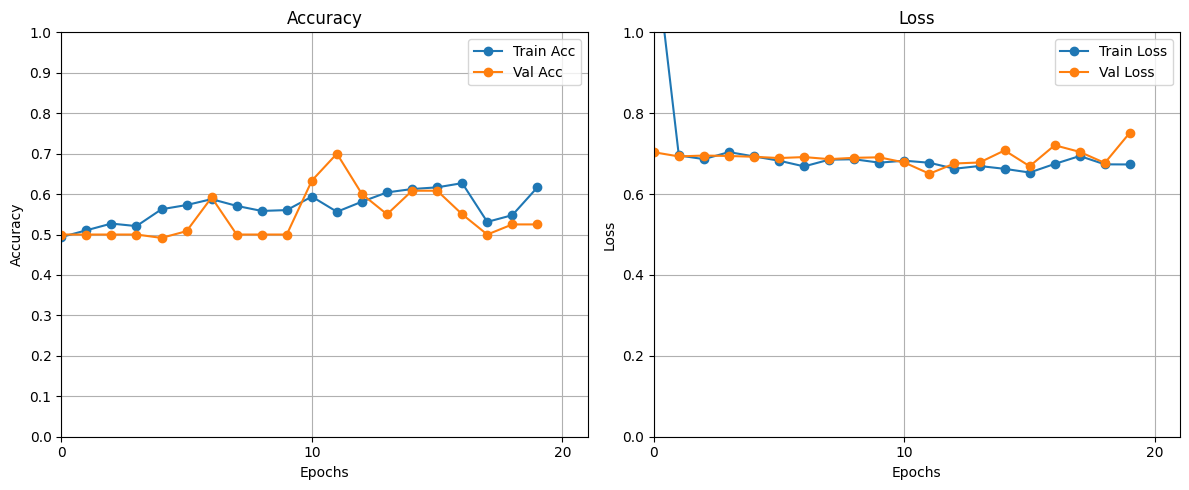

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# 配列の長さを基準にする
epochs_range = range(len(acc))

# 精度のグラフ
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, 'o-', label='Train Acc')
plt.plot(epochs_range, val_acc, 'o-', label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.xlim(0, len(acc) + 1)
plt.ylim(0.0, 1.0)
plt.gca().xaxis.set_major_locator(MultipleLocator(10))  # ← x軸 10ごと
plt.gca().yaxis.set_major_locator(MultipleLocator(0.1)) # ← y軸 0.1ごと
plt.grid(True)

# 損失のグラフ
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, 'o-', label='Train Loss')
plt.plot(epochs_range, val_loss, 'o-', label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xlim(0, len(acc) + 1)
plt.ylim(0, 1.0)
plt.gca().xaxis.set_major_locator(MultipleLocator(10))  # ← x軸 10ごと
plt.grid(True)

plt.tight_layout()
plt.show()

# 🟦 単純なCNNモデルによる犬・猫画像分類
このセルでは、基本的な構成の畳み込みニューラルネットワーク（CNN） をKeras Functional APIを使って定義しています。
3つの畳み込みブロックから成るシンプルなアーキテクチャで、小〜中規模の画像分類タスク（例: 犬と猫の分類）に適しています。

| セクション | 内容 |
|:-------|:--------|
| 入力層 |224x224x3（RGB画像） |
| 畳み込み + プーリング| ブロック構成。各ブロック: Conv2D → MaxPooling|
|Flattenの代替|GlobalAveragePooling2D でパラメータ数を圧縮|
|全結合層|Dense(256) + Dropout による分類処理|
|出力層|Dense(1, activation='sigmoid') の2値分類|



## 🔶 学習用コード

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# 単純なCNNモデルを構築
# Functional APIでモデルを定義する
inputs = layers.Input(shape=(224, 224, 3))
# 畳み込み＋プーリング層（3ブロック構成）
x = layers.Conv2D(64, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
# Flatten の代わりに GlobalAveragePoolingでパラメータ削減
x = layers.GlobalAveragePooling2D()(x)
# 全結合層
x = layers.Dense(256, activation='relu')(x)
# 出力層（2値問題）
outputs = layers.Dense(1, activation='sigmoid')(x)
#　モデル構築
model = models.Model(inputs=inputs, outputs=outputs)
# コンパイル
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 109, 109, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 145,857 (569.75 KB)

 Trainable params: 145,857 (569.75 KB)

 Non-trainable params: 0 (0.00 B)

## 🔶 学習

In [ ]:
# 学習
history=model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)
model.save('/content/drive/MyDrive/model/simple_cnn__cats_and_dogs.keras')

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 893ms/step - accuracy: 0.5129 - loss: 0.6950 - val_accuracy: 0.5000 - val_loss: 0.6941
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 639ms/step - accuracy: 0.4911 - loss: 0.6943 - val_accuracy: 0.5000 - val_loss: 0.6915
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 591ms/step - accuracy: 0.4885 - loss: 0.6936 - val_accuracy: 0.6167 - val_loss: 0.6918
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 790ms/step - accuracy: 0.4967 - loss: 0.6925 - val_accuracy: 0.5000 - val_loss: 0.6896
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 693ms/step - accuracy: 0.5196 - loss: 0.6944 - val_accuracy: 0.5917 - val_loss: 0.6890
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 689ms/step - accuracy: 0.5415 - loss: 0.6882 - val_accuracy: 0.5250 - val_loss: 0.6903
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 595ms/step - accuracy: 0.5198 - loss: 0.6858 - val_accuracy: 0.5833 - val_loss: 0.6918
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 697ms/step - accuracy: 0.5384 - loss: 0.6891 - val_accura

## 🔶 学習履歴の描画

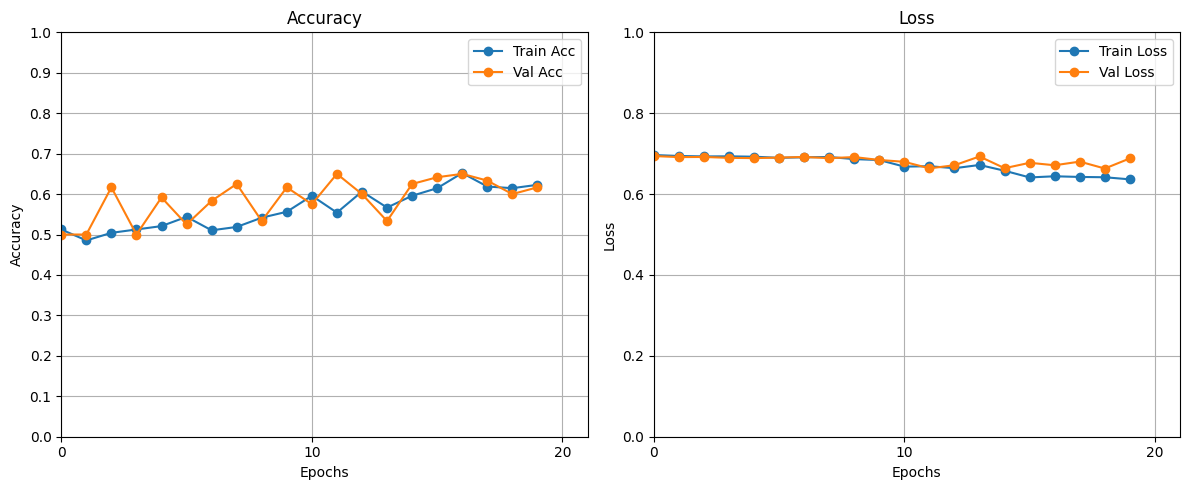

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# 配列の長さを基準にする
epochs_range = range(len(acc))

# 精度のグラフ
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, 'o-', label='Train Acc')
plt.plot(epochs_range, val_acc, 'o-', label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.xlim(0, len(acc) + 1)
plt.ylim(0.0, 1.0)
plt.gca().xaxis.set_major_locator(MultipleLocator(10))  # ← x軸 10ごと
plt.gca().yaxis.set_major_locator(MultipleLocator(0.1)) # ← y軸 0.1ごと
plt.grid(True)

# 損失のグラフ
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, 'o-', label='Train Loss')
plt.plot(epochs_range, val_loss, 'o-', label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xlim(0, len(acc) + 1)
plt.ylim(0, 1.0)
plt.gca().xaxis.set_major_locator(MultipleLocator(10))  # ← x軸 10ごと
plt.grid(True)

plt.tight_layout()
plt.show()

# 🟦 VGG16モデルのファインチューニングによる犬・猫画像分類
VGG16モデルをベースとした転移学習（Transfer Learning） によって、画像分類モデルを構築しています。
VGG16はImageNetで事前学習された強力な特徴抽出器であり、小〜中規模のタスクに対しては、カスタム分類層（ヘッド）を追加することで高精度な分類が可能です。

| セクション | 内容 |
|:-------|:--------|
| ベースモデル |VGG16(weights='imagenet') を使用し、特徴抽出器として利用 |
| 全層凍結| 転移学習の初期段階では、VGG16の重みを固定（trainable=False）にする|
|カスタム分類ヘッド|Flatten → Dense(256) → Dropout(0.5) → Dense(1, sigmoid) で2クラス分類|
|最適化・損失関数|Adam + binary_crossentropy を用いて2値分類タスクに対応|

## 🔶 学習コード

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# VGG16の読み込み（ImageNetで事前学習された重みを使う、全層を一旦固定）
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# カスタム分類ヘッドを追加（Flatten → Dense → Dropout → Dense）
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x) # 2クラス分類のため、分類ヘッドを2にする

# 新しいモデルを構築（入力はVGG16の入力、出力は自作ヘッド）
model = Model(inputs=base_model.input, outputs=predictions)

# 事前学習済みモデルの特徴抽出器（Conv層）を凍結
base_model.trainable = False

# Conv層を部分的に解凍（最後の4層だけ訓練可能）
base_model.trainable = True
for layer in base_model.layers[:-4]:
    layer.trainable = False

# モデルをコンパイル（やや高めの学習率）
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,137,729 (80.63 MB)

 Trainable params: 13,502,465 (51.51 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

## 🔶 学習

In [ ]:
# 全結合層と畳み込み層の一部を訓練
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)

# モデル保存
model.save("/content/drive/MyDrive/model/vgg16_fine_tuned.keras")

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.5638 - loss: 0.7616 - val_accuracy: 0.7000 - val_loss: 0.5432
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 712ms/step - accuracy: 0.7936 - loss: 0.4875 - val_accuracy: 0.9000 - val_loss: 0.2924
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 740ms/step - accuracy: 0.8877 - loss: 0.2785 - val_accuracy: 0.8917 - val_loss: 0.2231
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 741ms/step - accuracy: 0.8811 - loss: 0.2400 - val_accuracy: 0.9333 - val_loss: 0.1889
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 726ms/step - accuracy: 0.9307 - loss: 0.1649 - val_accuracy: 0.9333 - val_loss: 0.1870
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 730ms/step - accuracy: 0.9280 - loss: 0.2015 - val_accuracy: 0.9167 - val_loss: 0.1912
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 744ms/step - accuracy: 0.9638 - loss: 0.0976 - val_accuracy: 0.8833 - val_loss: 0.4085
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 737ms/step - accuracy: 0.9428 - loss: 0.1246 - val_accurac

## 🔶 学習履歴の描画

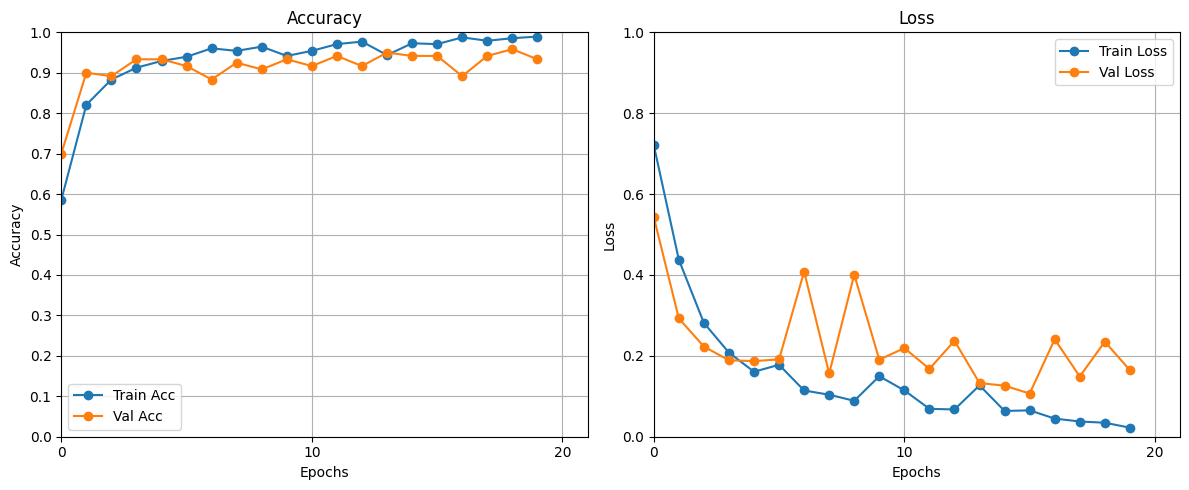

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# 配列の長さを基準にする
epochs_range = range(len(acc))

# 精度のグラフ
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, 'o-', label='Train Acc')
plt.plot(epochs_range, val_acc, 'o-', label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.xlim(0, len(acc) + 1)
plt.ylim(0.0, 1.0)
plt.gca().xaxis.set_major_locator(MultipleLocator(10))  # ← x軸 10ごと
plt.gca().yaxis.set_major_locator(MultipleLocator(0.1)) # ← y軸 0.1ごと
plt.grid(True)

# 損失のグラフ
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, 'o-', label='Train Loss')
plt.plot(epochs_range, val_loss, 'o-', label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xlim(0, len(acc) + 1)
plt.ylim(0, 1.0)
plt.gca().xaxis.set_major_locator(MultipleLocator(10))  # ← x軸 10ごと
plt.grid(True)

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
猫の確率：1.0000
犬の確率：0.0000


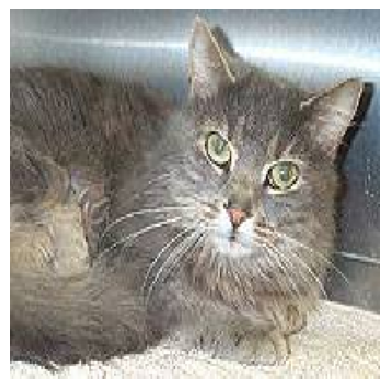

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# モデルの読み込み（学習済みモデルのパス）
model = load_model('/content/drive/MyDrive/model/vgg16_fine_tuned.keras')

# 推論したい画像のパス
img_path = '/content/drive/MyDrive/res/cats_and_dogs_test/7.jpg'

# 画像の読み込みと前処理
img = image.load_img(img_path, target_size=(224, 224))  # VGG16 に合わせてサイズを統一
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # 正規化（rescale=1./255 を合わせる）
img_array = np.expand_dims(img_array, axis=0)  # (224, 224, 3) → (1, 224, 224, 3)

# 推論（出力は1つの確率値）
pred = model.predict(img_array)[0][0]

# 猫・犬の確率を算出
cat_prob = 1 - pred
dog_prob = pred

# 表示（小数点第4位まで）
print(f'猫の確率：{cat_prob:.4f}')
print(f'犬の確率：{dog_prob:.4f}')

import matplotlib.pyplot as plt

plt.imshow(img)
plt.axis('off')
plt.show()

# 🟦 VGG16モデルによる画像データの予測方法

# 🟦 ResNetモデルによる画像データの予測方法

In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

model = ResNet50(weights='imagenet', include_top=True)

img_path = '/content/drive/MyDrive/res/creative_commons_elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicte: ', decode_predictions(preds, top=3)[0])

plt.imshow(img)
plt.axis('off')
plt.show()

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# 📌Google Colabのランタイム終了

In [ ]:
from google.colab import runtime
runtime.unassign()